In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import RegularGridInterpolator, interpn
from cycler import cycler
from scipy.stats import linregress

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

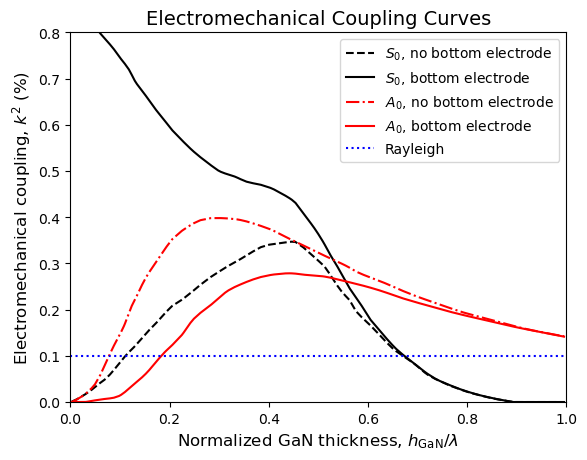

In [2]:


# Replace 'your_csv_file.csv' with the actual name of your CSV file
csv_file = 'Fig3-4.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file)
#ilter the DataFrame for the specific curve names
curve_names = ['S0_no_elec', 'S0_bot_elec', 'A0_no_elec', 'A0_bot_elec']
filtered_df = df[curve_names]

# Assuming that the CSV has a column for the x-axis values (e.g., 'x')
x_values = df['x'] if 'x' in df.columns else range(len(filtered_df))

# Create the figure and axes
fig, ax = plt.subplots()

# Define line styles and colors for each curve
line_styles = {
    'S0_no_elec': {'linestyle': '--', 'color': 'black', 'label': r'$S_0$, no bottom electrode'},
    'S0_bot_elec': {'linestyle': '-', 'color': 'black', 'label': r'$S_0$, bottom electrode'},
    'A0_no_elec': {'linestyle': '-.', 'color': 'red', 'label': r'$A_0$, no bottom electrode'},
    'A0_bot_elec': {'linestyle': '-', 'color': 'red', 'label': r'$A_0$, bottom electrode'},
}

# Plot each curve with the specified styles using the ax object
for curve in curve_names:
    ax.plot(x_values, filtered_df[curve], 
            linestyle=line_styles[curve]['linestyle'], 
            color=line_styles[curve]['color'], 
            label=line_styles[curve]['label'])

# Add a horizontal line for Rayleigh
ax.axhline(y=0.1, color='blue', linestyle=':', label='Rayleigh')
ax.set_ylim(0,.8)
ax.set_xlim(0,1)
# Add labels and title
ax.set_xlabel(r'Normalized GaN thickness, $h_{\mathrm{GaN}}/\lambda$', fontsize=12)
ax.set_ylabel(r'Electromechanical coupling, $k^2$ (%)', fontsize=12)
ax.set_title('Electromechanical Coupling Curves', fontsize=14)

# Add a legend
ax.legend(loc='best', fontsize=10)

# Display the plot
plt.show()

In [28]:
df.columns

Index(['x', 'S0_no_elec', 'S0_bot_elec', 'A0_no_elec', 'A0_bot_elec'], dtype='object')

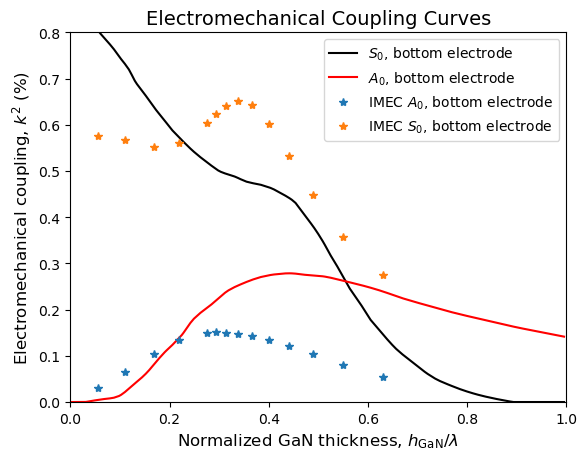

In [3]:


# Replace 'your_csv_file.csv' with the actual name of your CSV file
csv_file = 'Fig3-4.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file)
#ilter the DataFrame for the specific curve names
curve_names = ['S0_bot_elec', 'A0_bot_elec']
filtered_df = df[curve_names]
# Define the data extracted from the image
#is the following data from the java script? I ran the java script one at a time ? And then fed the image of table data to chatgpt to put into
#this dictionary 
comsol_data = {
    "lambda": [7.000E-06,8.000E-06,9.000E-06,1.000E-05,1.100E-05,1.200E-05,1.300E-05,1.400E-05,1.50E-05,1.60E-05,2.00E-05,2.60E-05,4.00E-05,8.00E-05],
    "hGan/Lambda": [0.63, 0.55, 0.49, 0.440, 0.400, 0.367, 0.338,0.314,0.293,0.275,0.220,0.169, .110,.055],
    "Antisymmetric ksq%": [0.055, 0.081, 0.103, 0.121, 0.134, 0.143, 0.148,0.150 ,0.152,0.149, 0.134,0.105,.064,.031],
    "Symmetric ksq%": [0.275, 0.358, 0.448, 0.533, 0.602, 0.643, 0.652,0.641,0.624,0.604,.56,.552,0.567,.576]
}

# Convert data to DataFrame
comsol_df = pd.DataFrame(comsol_data)
# Assuming that the CSV has a column for the x-axis values (e.g., 'x')
x_values = df['x'] if 'x' in df.columns else range(len(filtered_df))

# Create the figure and axes
fig, ax = plt.subplots()

# Define line styles and colors for each curve
line_styles = {
    'S0_no_elec': {'linestyle': '--', 'color': 'black', 'label': r'$S_0$, no bottom electrode'},
    'S0_bot_elec': {'linestyle': '-', 'color': 'black', 'label': r'$S_0$, bottom electrode'},
    'A0_no_elec': {'linestyle': '-.', 'color': 'red', 'label': r'$A_0$, no bottom electrode'},
    'A0_bot_elec': {'linestyle': '-', 'color': 'red', 'label': r'$A_0$, bottom electrode'},
}

# Plot each curve with the specified styles using the ax object
for curve in curve_names:
    ax.plot(x_values, filtered_df[curve], 
            linestyle=line_styles[curve]['linestyle'], 
            color=line_styles[curve]['color'], 
            label=line_styles[curve]['label'])

ax.plot(comsol_df["hGan/Lambda"], comsol_df["Antisymmetric ksq%"], label=r'$\text{IMEC}\ A_0$, bottom electrode', linestyle='None', marker='*')
ax.plot(comsol_df["hGan/Lambda"], comsol_df["Symmetric ksq%"], label=r'$\text{IMEC}\ S_0$, bottom electrode', linestyle='None', marker='*')
ax.set_ylim(0,.8)
ax.set_xlim(0,1)
# Add labels and title
ax.set_xlabel(r'Normalized GaN thickness, $h_{\mathrm{GaN}}/\lambda$', fontsize=12)
ax.set_ylabel(r'Electromechanical coupling, $k^2$ (%)', fontsize=12)
ax.set_title('Electromechanical Coupling Curves', fontsize=14)

# Add a legend
ax.legend(loc='best', fontsize=10)

# Display the plot
plt.show()

In [4]:
# Replace 'your_csv_file.csv' with the actual name of your CSV file
csv_file = 'DC_dispersion_data.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file)
df.head()
df.size

135


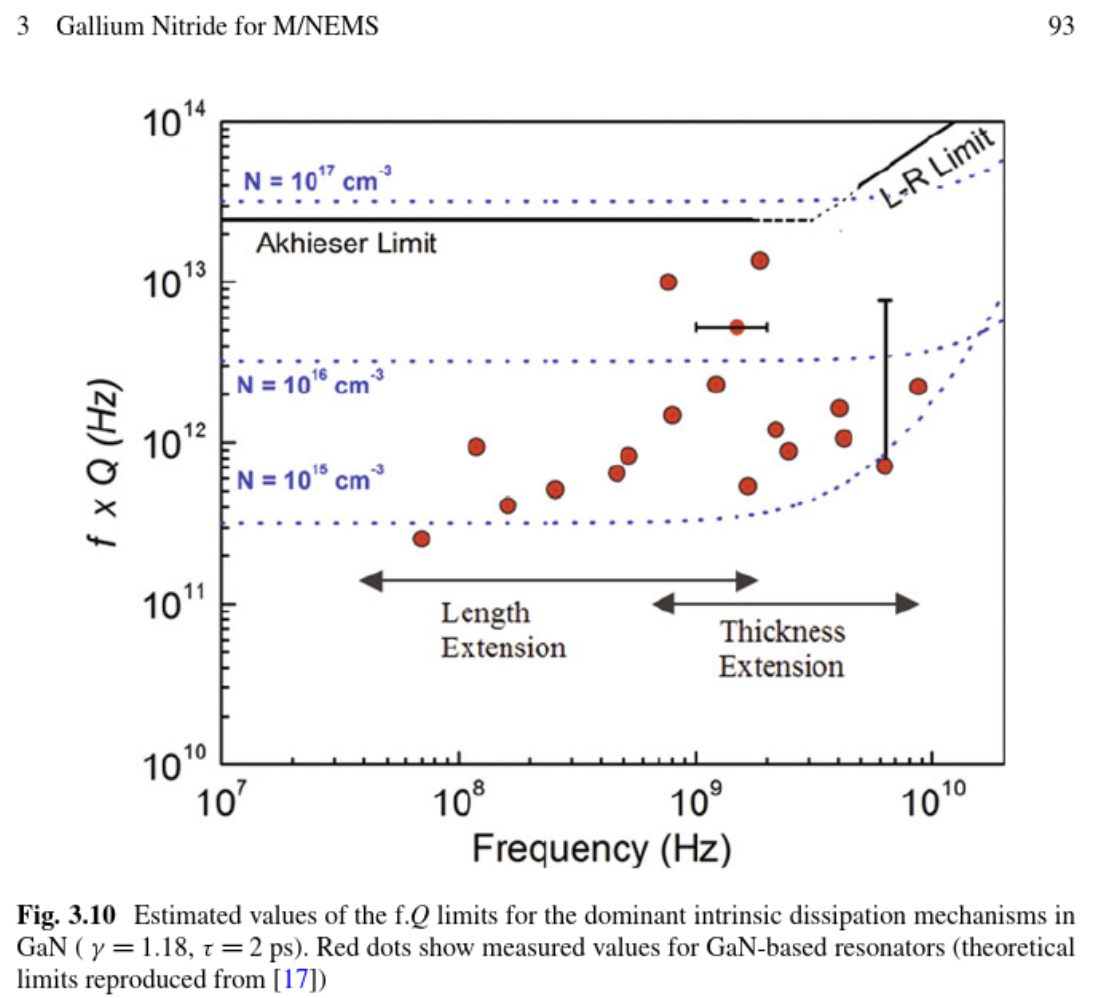

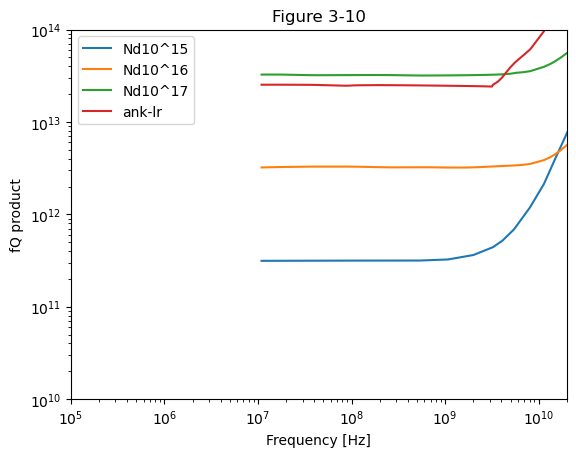

In [5]:
df = pd.read_csv('fQ-vs-f.csv')#, index_col='x')
fig, ax = plt.subplots()
for c in df.columns.drop('x'):
    ax.plot(df['x'], df[c], label=c)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e10,1e14)
ax.set_xlim(1e5,2e10)
ax.set_title('Figure 3-10')
ax.set_ylabel('fQ product')
ax.set_xlabel('Frequency [Hz]')
ax.legend()


In [6]:
start = [1e15, 1e7]  # Start values for x and y axes
stop = [1e17, 2e10]  # Stop values for x and y axes

# Create a 2D logarithmic spaced array
x = np.logspace(np.log10(start[0]), np.log10(stop[0]), 3)  # x-axis
y = np.logspace(np.log10(start[1]), np.log10(stop[1]), 44)  # y-axis
# Create a 2D grid using broadcasting
xg, yg = np.meshgrid(x, y, indexing='ij')
#grid.shape
x

array([1.e+15, 1.e+16, 1.e+17])

In [7]:
data = df[['Nd10^15','Nd10^16','Nd10^17']]
data.shape 
d = np.array(data)
d.shape

(44, 3)

In [8]:
dopings = np.array([1e15, 1e16, 1e17])

slope, intercept, r_value, p_value, std_err = linregress(dopings, d[0])

print(f"y = {slope:.3e} * x + {intercept:.3e}")
(1e15*slope + intercept)

y = 3.255e-04 * x + -2.399e+10


np.float64(301463153153.1523)

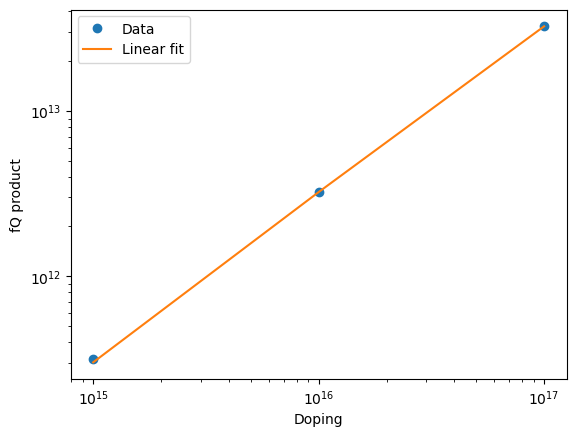

In [9]:

x_vals = np.array(x)
y_vals = np.array(y)
y_fit = slope * dopings + intercept

plt.plot(dopings, d[0], 'o', label='Data')
plt.plot(dopings, y_fit, '-', label='Linear fit')
plt.legend()
plt.xlabel('Doping')
plt.ylabel('fQ product')
plt.xscale('log')
plt.yscale('log')  # if appropriate
plt.show()


In [10]:
interp = RegularGridInterpolator((y,x), d,
                                 bounds_error=False, fill_value=None)

In [142]:
fQ_interp15 = interpn((y,x), d, xi = (f,n), method='slinear', bounds_error=True, fill_value=None)

In [ ]:
fQ_interp15

In [6]:
interp.grid

NameError: name 'interp' is not defined

In [11]:
n = np.ones(44)*1e15
#f = y
f = np.logspace(5, 10.3,44)
fQ15 = interp((f,n))
fQ16 = interp((f,np.ones(44)*1e16))
fQ17 = interp((f,np.ones(44)*1e17))

In [14]:
freq = 1e8
interp((freq, 1e16))/freq
#interp((1e15, 1e8))

np.float64(32393.720460893433)

In [20]:
df.columns


Index(['x', 'Nd10^15', 'Nd10^16', 'Nd10^17', 'ank-lr'], dtype='object')

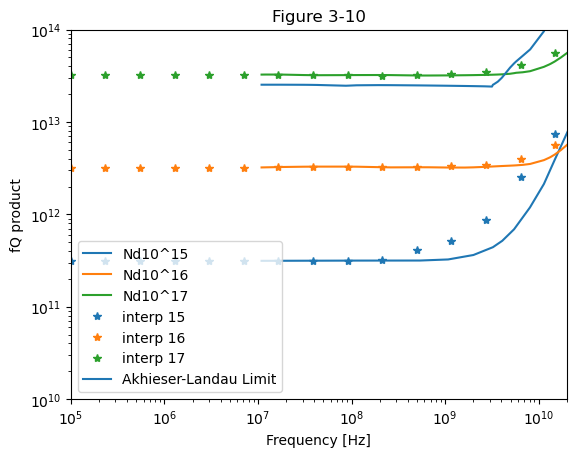

In [ ]:
fig, ax = plt.subplots()
# Define a 3-color cycle
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green
plt.rc('axes', prop_cycle=cycler('color', colors))
for c in df.columns.drop(['x', 'ank-lr']):
    ax.plot(df['x'], df[c], label=c)
ax.plot(f, fQ15, label='interp 15', linestyle='none', marker='*',markevery=3)
ax.plot(f, fQ16, label='interp 16', linestyle='none', marker='*',markevery=3)
ax.plot(f, fQ17, label='interp 17', linestyle='none', marker='*',markevery=3)
#ax.plot(f, fQ_interp15)
ax.plot(df['x'], df['ank-lr'], label='Akhieser-Landau Limit')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e10,1e14)
ax.set_xlim(1e5,2e10)
ax.set_xlabel('Frequency [Hz]')
ax.set_title('fQ Limit and Interpolations')
plt.ylabel('fQ product')
ax.legend()

Text(0, 0.5, 'Q')

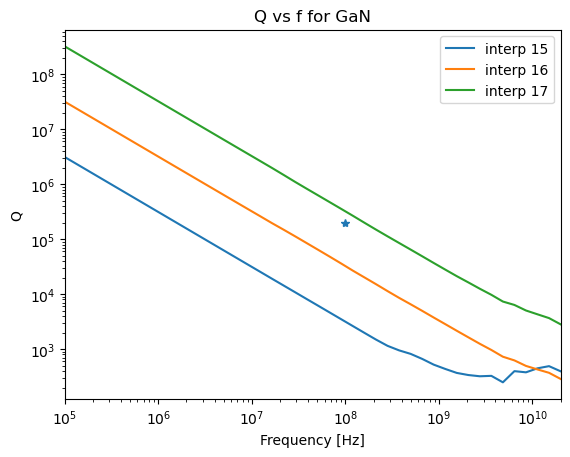

In [15]:
fig, ax = plt.subplots()
#for c in df.columns.drop('x'):
#    ax.plot(df['x'], df[c], label=c)
ax.plot(f, fQ15/f, label='interp 15')
ax.plot(f, fQ16/f, label='interp 16')
ax.plot(f, fQ17/f, label='interp 17')
ax.plot((freq), (interp((freq, 6e16))/freq), linestyle='None', marker='*')
#ax.plot(f, fQ_interp15)
ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_ylim(1e10,1e14)
ax.set_xlim(1e5,2e10)
ax.legend()
ax.set_title('Q vs f for GaN')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Q')

In [78]:
x, y = np.array([-2, 0, 4]), np.array([-2, 0, 2, 5])
def ff(x, y):
    return x**2 + y**2
xg, yg = np.meshgrid(x, y, indexing='ij')
data = ff(xg, yg)
interp = RegularGridInterpolator((x, y), data,
                                 bounds_error=False, fill_value=None)

In [ ]:
data

In [80]:
xg
yg

array([[-2, -2, -2, -2],
       [ 0,  0,  0,  0],
       [ 4,  4,  4,  4]])

array([[-2,  0,  2,  5],
       [-2,  0,  2,  5],
       [-2,  0,  2,  5]])

In [100]:
# Example grid points
concentrations = np.array([1e15, 1e16, 1e17])  # 3 concentration levels
frequencies = np.logspace(7, 10, 44)  # 44 frequency points from 10^7 to 10^10 Hz

# Create the interpolator
interp = RegularGridInterpolator((frequencies, concentrations), data, bounds_error=False, fill_value=None)

# Define the concentration level you're interested in
concentration_example = 1e15  # For example, the 10^15 cm^-3 concentration

# Define a range of frequencies (using the same frequency range as the grid)
freq_range = np.logspace(7, 10.3, 100)  # 100 points from 10^7 to 10^10 Hz

# Create a constant array of the concentration you're interested in
concentration_array = np.full_like(freq_range, concentration_example)

# Prepare points for interpolation
points = np.array([freq_range, concentration_array]).T  # Shape should be (100, 2)
points
points.shape
# Interpolate to get the fQ curve
fQ_curve = interp(points)

# Now you can plot the fQ_curve against freq_range

plt.plot(freq_range, fQ_curve)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('f x Q (Hz)')
plt.show()



array([[1.00000000e+07, 1.00000000e+15],
       [1.07977516e+07, 1.00000000e+15],
       [1.16591440e+07, 1.00000000e+15],
       [1.25892541e+07, 1.00000000e+15],
       [1.35935639e+07, 1.00000000e+15],
       [1.46779927e+07, 1.00000000e+15],
       [1.58489319e+07, 1.00000000e+15],
       [1.71132830e+07, 1.00000000e+15],
       [1.84784980e+07, 1.00000000e+15],
       [1.99526231e+07, 1.00000000e+15],
       [2.15443469e+07, 1.00000000e+15],
       [2.32630507e+07, 1.00000000e+15],
       [2.51188643e+07, 1.00000000e+15],
       [2.71227258e+07, 1.00000000e+15],
       [2.92864456e+07, 1.00000000e+15],
       [3.16227766e+07, 1.00000000e+15],
       [3.41454887e+07, 1.00000000e+15],
       [3.68694506e+07, 1.00000000e+15],
       [3.98107171e+07, 1.00000000e+15],
       [4.29866235e+07, 1.00000000e+15],
       [4.64158883e+07, 1.00000000e+15],
       [5.01187234e+07, 1.00000000e+15],
       [5.41169527e+07, 1.00000000e+15],
       [5.84341413e+07, 1.00000000e+15],
       [6.309573

(100, 2)

InvalidIndexError: (array([ 0,  0,  0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,
        8,  8,  9,  9, 10, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15,
       16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 21, 22, 22, 23, 23,
       24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32,
       32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40,
       40, 41, 41, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))